# Graph Theory: Simple and Shortest Paths - Lab

## Introduction

In this lab you'll take the concepts from the previous lesson and code them from scratch yourself! You'll start by unpacking Dijkstra's algorithm and write an implementation to find the shortest path between two nodes. From there, you'll expand on the initial function in order to return the path itself and create a visualization to better understand the underlying process.

## Objectives

In this lab you will: 

- Code Dijkstra's algorithm from scratch 
- Calculate simple paths and shortest paths for undirected, directed and weighted graphs 
- Visualize network graphs with networkx 


## Importing Packages

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Regenerating the [Small World] Network

To get started, here's the network from the previous lesson:

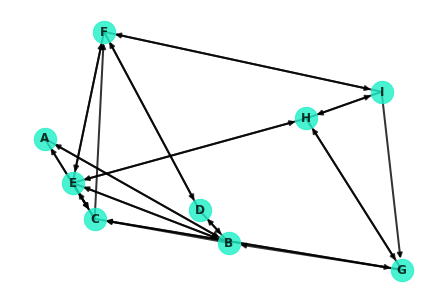

In [2]:
G = nx.navigable_small_world_graph(3, seed=3)
G = nx.relabel_nodes(G, dict(zip(G.nodes, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])))
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
        node_size=500, font_weight='bold', width=2, alpha=0.8)

## Dijkstra's Algorithm

As a helpful reference, here's the description of Dijkstra's Algorithm from the previous lesson:


Dijkstra's algorithm is essentially a depth based search. It commences at the starting node, spanning out to neighboring nodes and in turn visiting their neighbors in search of the destination. More formally, here's a general pseudocode outline for the algorithm:

1. Mark all nodes as unvisited
2. Set the distance of the starting node as 0, and $\infty$ for all other nodes
3. Set the starting node as the current node
4. Visit each of the neighbors of the current node
    1. For each neighbor, calculate the distance to that node traveling through the current node
    2. If this distance is less then the current distance recorded for that node, update the record accordingly
5. Mark the current node as "visited"
6. Of the unvisited nodes, set the one with the smallest distance to the current node
7. Repeat steps 4 through 6 until one of the following:
    1. The algorithm terminates when the destination node is the current node
    2. Alternatively, if the smallest distance of the unvisited nodes is $\infty$, then no path exists to the destination node. 

> Note: Dijkstra's algorithm (and NetworkX's implementations demonstrated above) returns a single path. In many cases, there may be multiple paths which are tied for the shortest distance between two nodes. In such cases, it is arbitrary which path is returned. 


## Coding Dijkstra's Algorithm (Part 1)

Implement a function to perform Dijkstra's algorithm. The function should take in three parameters: the graph `G`, the starting node `u`, and the destination node `v`. From there, return the minimum distance between nodes `u` and `v`. In the case that there is no path connecting `u` and `v`, printout an appropriate notification and return a missing value (`np.nan`). 

In [3]:
def dijkstra(G, u, v, default_weight=1):
    """
    G is the graph in question
    u is the starting node
    v is the destination node
    """
    
    nodes_list = list(G.nodes)
    idx_node_start = nodes_list.index(u)
    idx_node_end = nodes_list.index(v)
    print(f"nodes: {[n+(' (START)' if i==idx_node_start else (' (END)' if i==idx_node_end else '')) for i,n in enumerate(nodes_list)]}")
    print(f"edges: {G.edges}\n")
    
    U = set(nodes_list)
    V = set()
    D = {n:np.inf for n in U}
    P = {u:[u]} # holds the shortest path from u to some other node
    
    D[u] = 0
    current_node = u
    
    while len(U) > 0:
        
#         if current_node == v:
#             break
            
        if min([D[un] for un in U]) == np.inf:
            print(f"No path from {u} to {v} exists.")
            return np.inf, []
        
        print(f"source: {current_node}")
        
        # for neighbors of current_node (accomplished by...)
        neighbors = sorted(list(map(lambda t: t[1], filter(lambda t: t[0]==current_node, G.edges))))
        for neighbor in neighbors:
            print(f"\tneighbor {neighbor}")

            # calculate the distance to that node traveling through the current node
            d_cn_n = D[current_node] + G.nodes[neighbor].get('weight', default_weight)

            # if this distance is less then the current distance recorded for that node, 
            #    update the record accordingly
#             if not np.isinf(d_cn_n) and d_cn_n <= D[neighbor]:
            if d_cn_n < D[neighbor]:
                D[neighbor] = d_cn_n
                P[neighbor] = P[current_node] + [neighbor]
                print(f"\t\tpath update: {d_cn_n}:{P[neighbor]}")
                
        # mark the current node as "visited"
        V.add(current_node)
        U.remove(current_node)
        
        # of the unvisited nodes, set the one with the smallest distance to the current node
        if len(U) > 0:
            un_dists = sorted([(un, D[un]) for un in U], key=lambda und: und[1])
            current_node = un_dists[0][0] # first component of the first tuple

    return D[v], P[v]

Test out your function on a couple of node pairs, and compare the output to that of NetworkX's built in implementation to verify your results.

In [4]:
# Test your function here
dijkstra(G, 'I', 'A')

nodes: ['A (END)', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I (START)']
edges: [('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'D'), ('B', 'E'), ('B', 'C'), ('C', 'A'), ('C', 'E'), ('C', 'G'), ('C', 'F'), ('D', 'B'), ('D', 'F'), ('D', 'D'), ('E', 'B'), ('E', 'C'), ('E', 'F'), ('E', 'H'), ('F', 'D'), ('F', 'E'), ('F', 'I'), ('G', 'C'), ('G', 'H'), ('G', 'B'), ('H', 'E'), ('H', 'G'), ('H', 'I'), ('I', 'F'), ('I', 'H'), ('I', 'G')]

source: I
	neighbor F
		path update: 1:['I', 'F']
	neighbor G
		path update: 1:['I', 'G']
	neighbor H
		path update: 1:['I', 'H']
source: H
	neighbor E
		path update: 2:['I', 'H', 'E']
	neighbor G
	neighbor I
source: G
	neighbor B
		path update: 2:['I', 'G', 'B']
	neighbor C
		path update: 2:['I', 'G', 'C']
	neighbor H
source: F
	neighbor D
		path update: 2:['I', 'F', 'D']
	neighbor E
	neighbor I
source: E
	neighbor B
	neighbor C
	neighbor F
	neighbor H
source: C
	neighbor A
		path update: 3:['I', 'G', 'C', 'A']
	neighbor E
	neighbor F
	neighbor G
source: B
	neighbor A


(3, ['I', 'G', 'C', 'A'])

In [5]:
# Compare to NetworkX's built in method
nx.dijkstra_path_length(G, 'I', 'A')

3

## Coding Dijkstra's Algorithm (Part 2)

Now, update your algorithm to not only return the minimum distance between the two points, but a list of nodes outlining the directions for the shortest path from the starting node to the destination node. The direction list of nodes should start with the starting node, and end with the destination node, with intermediate step nodes in between. For example, just like the built in method from NetworkX:  

```python
nx.dijkstra_path(G, 'I', 'A')
```
should return 

```python
['I', 'G', 'C', 'A']
```


In [6]:
# def dijkstra(G, u, v, return_path_directions=True):
#     """
#     G is the graph in question
#     u is the starting node
#     v is the destination node
#     """
# already did it!

Now check your updated function against the built in methods from NetworkX again.

In [7]:
# Your code here
nx.dijkstra_path(G, 'I', 'A')

['I', 'G', 'C', 'A']

## Level-Up: Creating a Visual

Modify your function in order to produce successive plots to visualize the process of Dijkstra's algorithm. Plot the edges connecting the starting node to "visited" nodes using one color (ideally, `'#00b3e6'`). Then, plot the current edge connecting the current node to the neighbor being explored with another color (ideally, `'#ffd43d'`). Create a subplot of these graphs to show the process of the algorithm.

Putting these plots together, you can also create a fun interactive visual of Dijkstra's algorithm!
Here's what the search for the shortest path between `F` and `G` looks like:

<img src="images/Dijkstra_Visualized.gif">

Or broken apart, here are the individual steps shown as subplots:

<img src="images/dijkstra_subplots.png">

In [8]:
from IPython.display import Markdown

def dijkstra(G, u, v, default_weight=1, disp_plots=False):
    """
    G is the graph in question
    u is the starting node
    v is the destination node
    """
    
    nodes_list = list(G.nodes)
    idx_node_start = nodes_list.index(u)
    idx_node_end = nodes_list.index(v)
    print(f"nodes: {[n+(' (START)' if i==idx_node_start else (' (END)' if i==idx_node_end else '')) for i,n in enumerate(nodes_list)]}")
    print(f"edges: {G.edges}\n")
    
    U = set(nodes_list)
    V = set()
    D = {n:np.inf for n in U}
    P = {u:[u]} # holds the shortest path from u to some other node
    
    if disp_plots:
        node_color_start = '#25D21B'
        node_color_end = '#D21B1B'
        node_color_visit = '#FCFF00' #'#8FD21B'
        node_color_neighbor = '#D27D1B'
        node_color_unvisited = '#1CF0C7' # all nodes other than start (u) and finish (v) will be this color
        node_color_visited = '#00B3E6'
        
        edge_color_visited = node_color_visited
        edge_color_explore_neighbor = node_color_neighbor
        
        # visualize: state 0 (init)
        node_colors = [node_color_unvisited for n in nodes_list]
        node_colors[idx_node_start] = node_color_start
        node_colors[idx_node_end] = node_color_end
        
        max_degree = len(nodes_list)-1
        n_cols = 6
        n_rows = int((max_degree**2)/n_cols)+1
        w = 20
        
        fig = plt.figure(figsize=(w,(w/n_cols)*n_rows))
        ax = fig.add_subplot(n_rows,n_cols,1)
        nx.draw(
            G, 
            pos=nx.random_layout(G, seed=9), 
            with_labels=True, 
            node_color=node_colors,
            node_size=500, 
            font_weight='bold', 
            width=2, 
            alpha=0.8, 
            ax=ax
        )
        ax.set_title(f'INIT: START=={u}, END=={v}')
        plot_n = 2
        
    D[u] = 0
    current_node = u
    
    while len(U) > 0:
        
#         if current_node == v:
#             break
            
        if min([D[un] for un in U]) == np.inf:
            print(f"No path from {u} to {v} exists.")
            return np.inf, []
        
        print(f"visit: {current_node}")
        
        if disp_plots:
            node_colors = [node_color_unvisited for n in nodes_list]
            node_colors[idx_node_start] = node_color_start
            node_colors[idx_node_end] = node_color_end

        visited_edges = []
        visisted_neighbors = []
        
        # for neighbors of current_node (accomplished by...)
        neighbors = sorted(list(map(lambda t: t[1], filter(lambda t: t[0]==current_node, G.edges))))
        for neighbor in neighbors:
            print(f"\tneighbor {neighbor}")

            # calculate the distance to that node traveling through the current node
            d_cn_n = D[current_node] + G.nodes[neighbor].get('weight', default_weight)

            # if this distance is less then the current distance recorded for that node, 
            #    update the record accordingly
#             if not np.isinf(d_cn_n) and d_cn_n <= D[neighbor]:
            if d_cn_n < D[neighbor]:
                D[neighbor] = d_cn_n
                P[neighbor] = P[current_node] + [neighbor]
                print(f"\t\tpath update: {d_cn_n}:{P[neighbor]}")
                
            if disp_plots:
                if current_node != u:
                    # change color of u back to node_color_start
                    node_colors[idx_node_start] = node_color_start
                if current_node != v:
                    # change color of v back to node_color_end
                    node_colors[idx_node_end] = node_color_end
                for v_neighbor in list(map(lambda v_e: v_e[1], visited_edges)):
                    node_colors[nodes_list.index(v_neighbor)] = node_color_visited
                # change to 'visit' color for current_node
                node_colors[nodes_list.index(current_node)] = node_color_visit
                # change to 'neighbor' (explore) color for current neighbor node
                node_colors[nodes_list.index(neighbor)] = node_color_neighbor
                    
                ax = fig.add_subplot(n_rows,n_cols,plot_n)
                # Base Plot
                nx.draw(
                    G, 
                    pos=nx.random_layout(G, seed=9), 
                    with_labels=True, 
                    node_color=node_colors,
                    node_size=500, 
                    font_weight='bold', 
                    width=2, 
                    alpha=.8, 
                    ax=ax
                )
                # Recolor paths to visited nodes
                nx.draw_networkx_edges(
                    G, 
                    edgelist=visited_edges, 
                    pos=nx.random_layout(G, seed=9),
                    width=3, 
                    edge_color=edge_color_visited, 
                    ax=ax
                );
                # Recolor current path
                nx.draw_networkx_edges(
                    G, 
                    edgelist=[(current_node, neighbor)], 
                    pos=nx.random_layout(G, seed=9),
                    width=3, 
                    edge_color=edge_color_explore_neighbor, 
                    ax=ax
                );
                ax.set_title(f"Step {plot_n-1}: {current_node}$\\rightarrow${neighbor}")
                visited_edges.append((current_node, neighbor))
                plot_n += 1
                
        # mark the current node as "visited"
        V.add(current_node)
        U.remove(current_node)
        
        # of the unvisited nodes, set the one with the smallest distance to the current node
        if len(U) > 0:
            un_dists = sorted([(un, D[un]) for un in U], key=lambda und: und[1])
            current_node = un_dists[0][0] # first component of the first tuple from ascending-ordered list
        
    if disp_plots:
        SPE = []
        tpl = []
        s_SP = ""
        for i, n in enumerate(P[v]):
            tpl.append(n)
            s_SP += ("$\\rightarrow$" if len(s_SP)>0 else "") + f"{n}"
            if len(tpl)==2:
                SPE.append(tuple(tpl))
                tpl = [tpl[1]]
        ax = fig.add_subplot(n_rows,n_cols,plot_n)
        node_colors = [node_color_unvisited for n in nodes_list]
        node_colors[idx_node_start] = node_color_start
        node_colors[idx_node_end] = node_color_end
        nx.draw(
            G, 
            pos=nx.random_layout(G, seed=9), 
            with_labels=True, 
            node_color=node_colors,
            node_size=500, 
            font_weight='bold', 
            width=2, 
            alpha=.8, 
            ax=ax
        )
        nx.draw_networkx_edges(
            G, 
            edgelist=SPE, 
            pos=nx.random_layout(G, seed=9),
            width=3, 
            edge_color=node_color_visit, 
            ax=ax
        );
        ax.set_title(f"Shortest Path SOLUTION: {s_SP} (length {D[v]})")
        display(Markdown("### Visualization: Dijkstra's Algorithm"))
        plt.show()

    return D[v], P[v]

nodes: ['A', 'B', 'C', 'D', 'E', 'F (START)', 'G (END)', 'H', 'I']
edges: [('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'D'), ('B', 'E'), ('B', 'C'), ('C', 'A'), ('C', 'E'), ('C', 'G'), ('C', 'F'), ('D', 'B'), ('D', 'F'), ('D', 'D'), ('E', 'B'), ('E', 'C'), ('E', 'F'), ('E', 'H'), ('F', 'D'), ('F', 'E'), ('F', 'I'), ('G', 'C'), ('G', 'H'), ('G', 'B'), ('H', 'E'), ('H', 'G'), ('H', 'I'), ('I', 'F'), ('I', 'H'), ('I', 'G')]

visit: F
	neighbor D
		path update: 1:['F', 'D']
	neighbor E
		path update: 1:['F', 'E']
	neighbor I
		path update: 1:['F', 'I']
visit: E
	neighbor B
		path update: 2:['F', 'E', 'B']
	neighbor C
		path update: 2:['F', 'E', 'C']
	neighbor F
	neighbor H
		path update: 2:['F', 'E', 'H']
visit: I
	neighbor F
	neighbor G
		path update: 2:['F', 'I', 'G']
	neighbor H
visit: D
	neighbor B
	neighbor D
	neighbor F
visit: C
	neighbor A
		path update: 3:['F', 'E', 'C', 'A']
	neighbor E
	neighbor F
	neighbor G
visit: H
	neighbor E
	neighbor G
	neighbor I
visit: G
	neighbor B
	neighb

### Visualization: Dijkstra's Algorithm

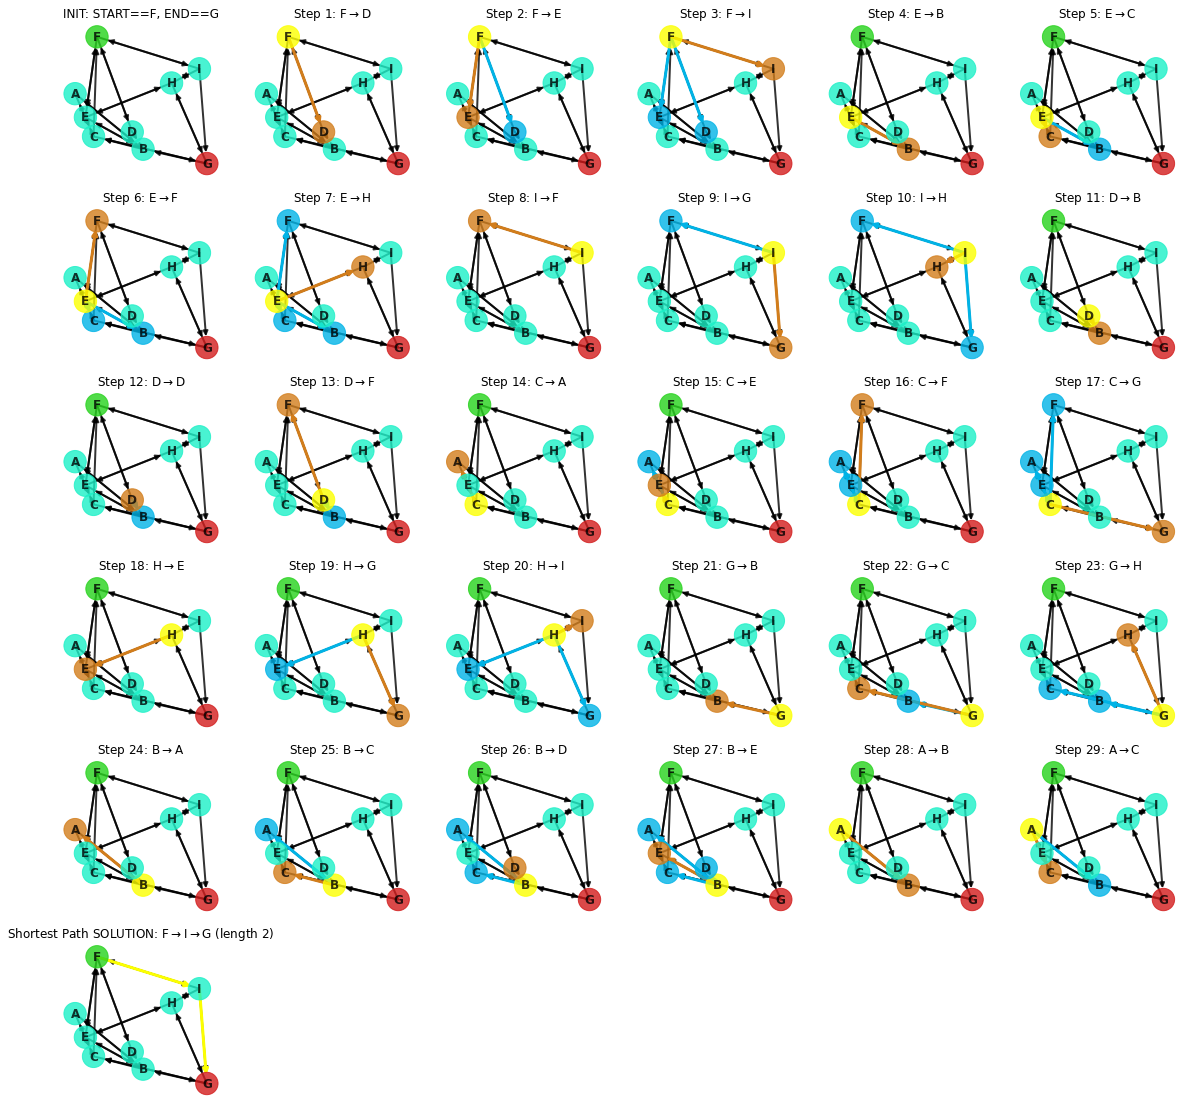

(2, ['F', 'I', 'G'])

In [9]:
dijkstra(G, 'F', 'G', disp_plots=True)

nodes: ['A (END)', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I (START)']
edges: [('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'D'), ('B', 'E'), ('B', 'C'), ('C', 'A'), ('C', 'E'), ('C', 'G'), ('C', 'F'), ('D', 'B'), ('D', 'F'), ('D', 'D'), ('E', 'B'), ('E', 'C'), ('E', 'F'), ('E', 'H'), ('F', 'D'), ('F', 'E'), ('F', 'I'), ('G', 'C'), ('G', 'H'), ('G', 'B'), ('H', 'E'), ('H', 'G'), ('H', 'I'), ('I', 'F'), ('I', 'H'), ('I', 'G')]

visit: I
	neighbor F
		path update: 1:['I', 'F']
	neighbor G
		path update: 1:['I', 'G']
	neighbor H
		path update: 1:['I', 'H']
visit: H
	neighbor E
		path update: 2:['I', 'H', 'E']
	neighbor G
	neighbor I
visit: G
	neighbor B
		path update: 2:['I', 'G', 'B']
	neighbor C
		path update: 2:['I', 'G', 'C']
	neighbor H
visit: F
	neighbor D
		path update: 2:['I', 'F', 'D']
	neighbor E
	neighbor I
visit: E
	neighbor B
	neighbor C
	neighbor F
	neighbor H
visit: C
	neighbor A
		path update: 3:['I', 'G', 'C', 'A']
	neighbor E
	neighbor F
	neighbor G
visit: B
	neighbor A
	neighb

### Visualization: Dijkstra's Algorithm

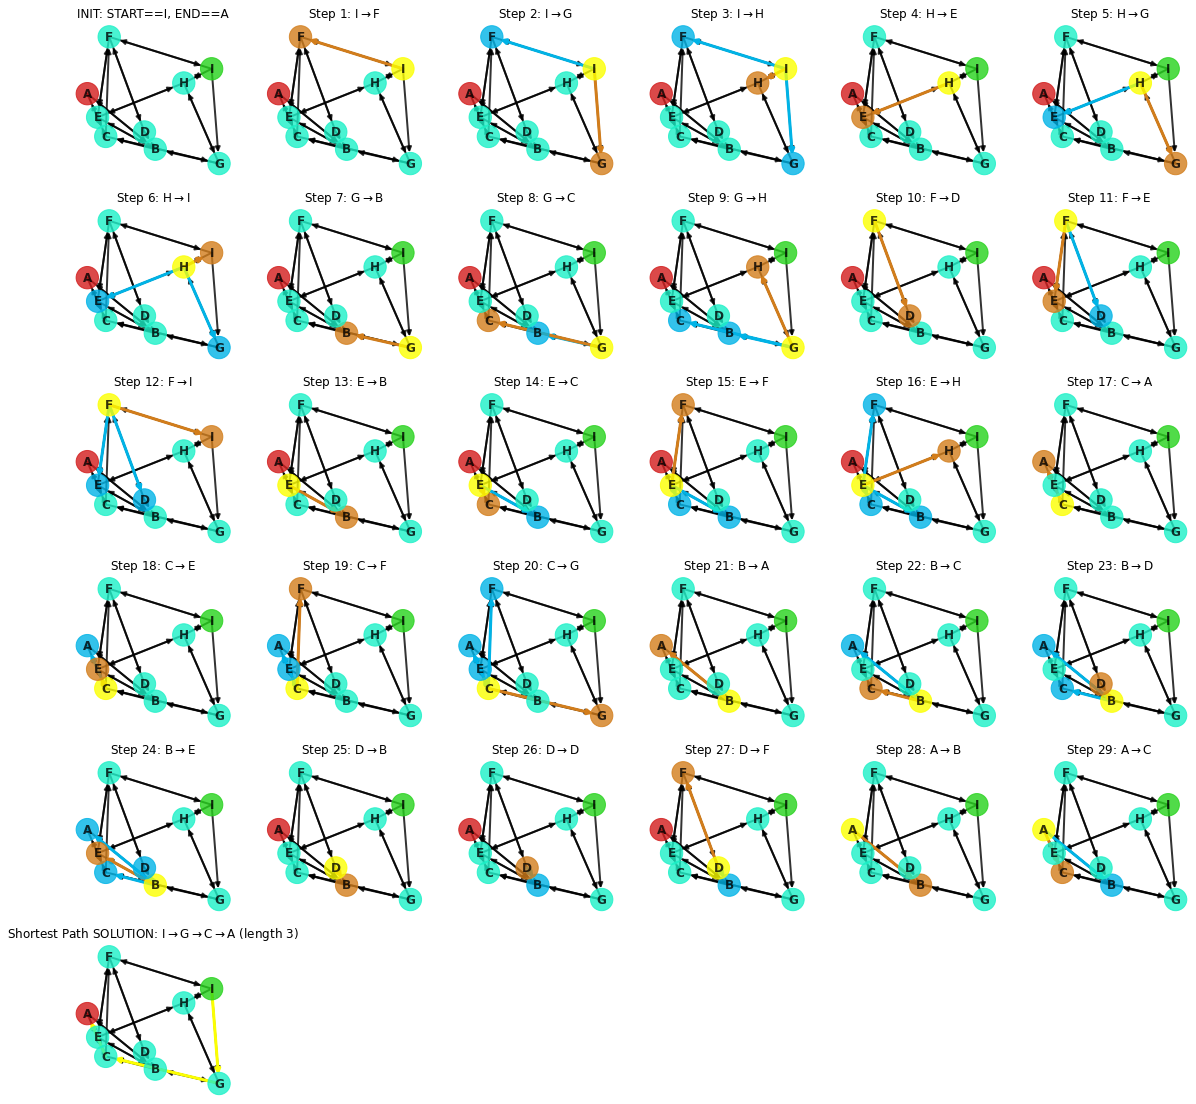

(3, ['I', 'G', 'C', 'A'])

In [10]:
# let's check the previous G, 'I', 'A' run...
dijkstra(G, 'I', 'A', disp_plots=True)

## Summary 

Well done! In this lab, you deconstructed Dijkstra's algorithm and coded your own implementation! Finding the shortest path between nodes is a foundational concept in network theory and will help inform future concepts such as centrality and betweenness in order to further analyze the structures of graphs.